# Shark Attack Project

---

# Importing libraries

---

In [166]:
# Data wrangling and cleaning
import pandas as pd
import numpy as np
import re
from country_converter import CountryConverter

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To handle species.txt file accessible through a url
import urllib

# To create "year", "month", and "day" columns
from datetime import datetime

# Setting preferences for pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

---

# Loading file into a DataFrame

---

In [167]:
with open("data/attacks.csv", "rb") as file:
    file_lines = file.readlines(500)
    for line in file_lines:
        print(line.decode('latin-1'))

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,



In [168]:
shark = pd.read_csv("data/attacks.csv", sep=",", encoding="latin-1")

print(f"DataFrame shape = {shark.shape}\n")
print(f"{shark.info()}\n")

DataFrame shape = (25723, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species

In [169]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


---

# Standardizing column names

---

In [170]:
standardized_shark_cols = [col.strip().lower().replace(" ", "_") for col in shark.columns]
shark.columns = standardized_shark_cols

shark.head(2)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN


---

# Addressing null values

---

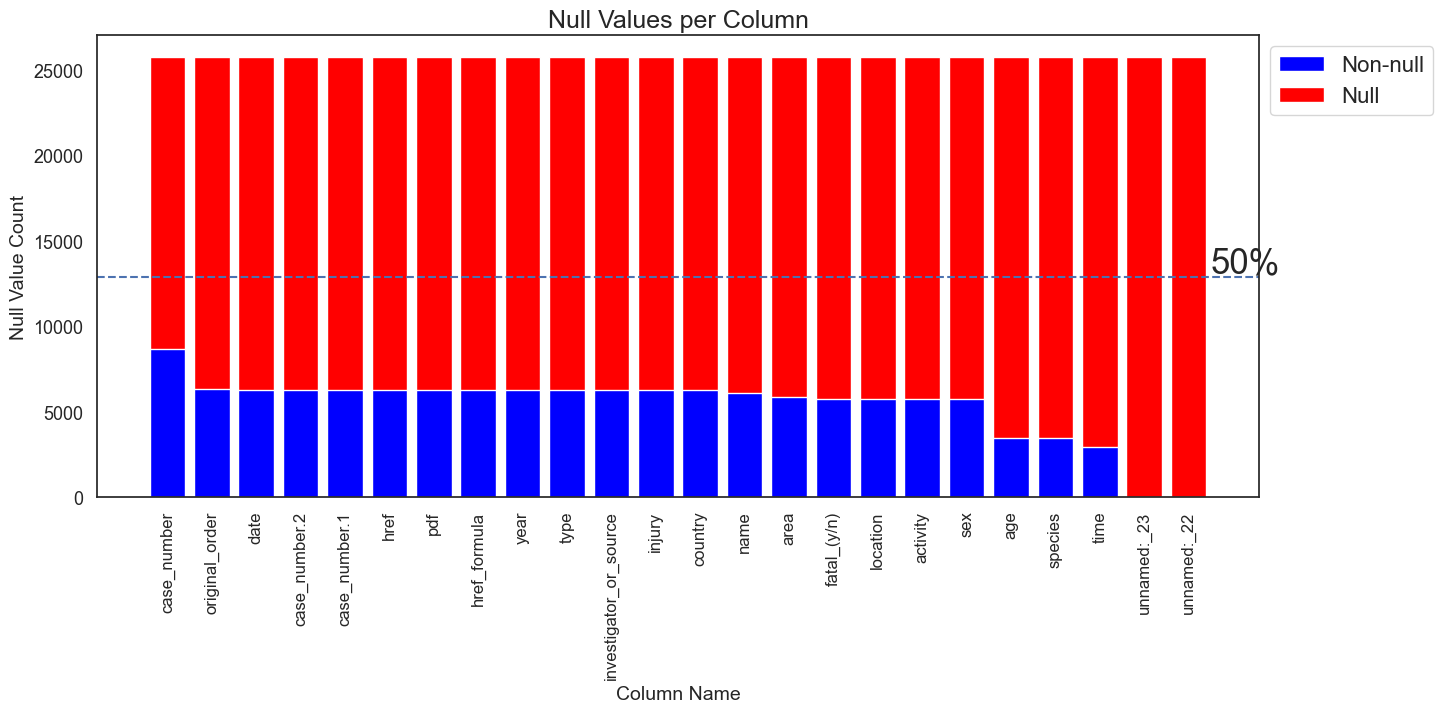

In [171]:
fig, ax = plt.subplots(figsize = (15, 6))

null_count_cols = shark.isna().sum().sort_values()

plt.bar(x=null_count_cols.index, height=shark.shape[0], color="blue", label="Non-null")
plt.bar(x=null_count_cols.index, height=null_count_cols, bottom=shark.shape[0]-null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(23.5, shark.shape[0]/2 + 300), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=90, fontsize=12)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

In [172]:
shark["null_count"] = shark.isna().sum(axis=1)
shark["null_count"].head(3)

0    2
1    3
2    3
Name: null_count, dtype: int64

In [173]:
shark.describe()

,year,original_order,null_count
count,6300.000000,6309.000000,25723.000000
mean,1927.272381,3155.999683,18.982078
std,281.116308,1821.396206,8.631545
min,0.000000,2.000000,2.000000
25%,1942.000000,1579.000000,23.000000
50%,1977.000000,3156.000000,24.000000
75%,2005.000000,4733.000000,24.000000
max,2018.000000,6310.000000,24.000000


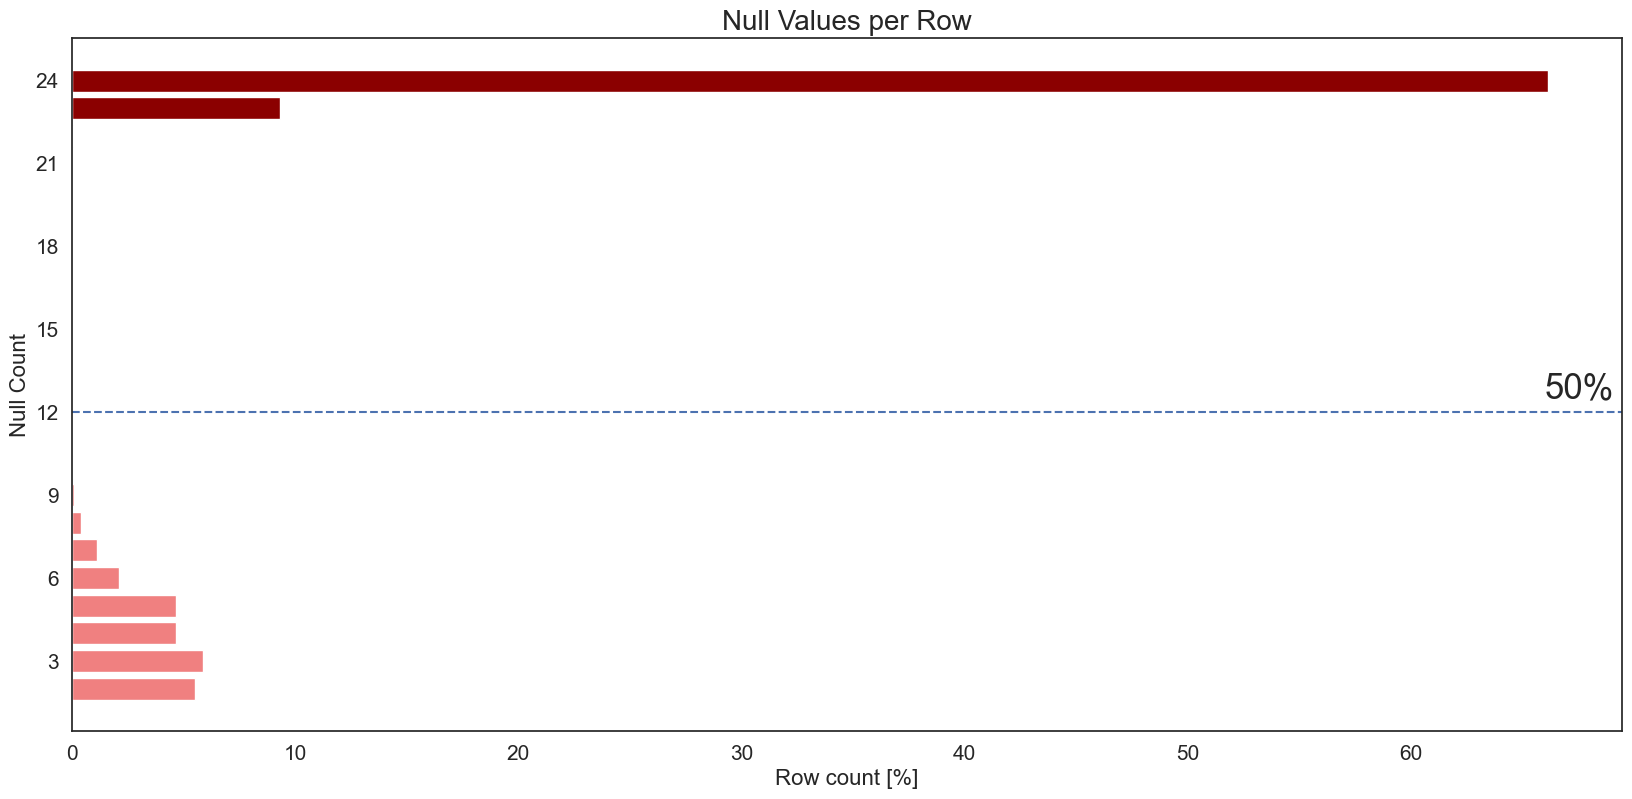

In [174]:
fig, ax = plt.subplots(figsize = (20, 9))

# Obtaining value_counts from shark DataFrame
null_percentages = shark["null_count"].value_counts(normalize=True) * 100

# Creating list comprehension for color scheme
color = ["darkred" if (nan_count >= 12) else "lightcoral" for nan_count in null_percentages.index]

plt.barh(y=null_percentages.index, width=null_percentages, color=color)

# Line-drawing and text annotation
plt.axhline(y=12, linestyle="--")
ax.annotate("50%", xy=(66, 12.5), fontsize=25)

# x-labels
ax.set_xlabel("Row count [%]", fontsize=16)
plt.xticks(fontsize=15)

# y-labels
ax.set_ylabel("Null Count", fontsize=16)
plt.yticks(ticks=[3, 6, 9, 12, 15, 18, 21, 24], fontsize=15)

# Title
ax.set_title("Null Values per Row", fontsize=20);

In [175]:
too_many_nan_mask = shark[shark["null_count"] >=20]
shark_clean = shark.drop(too_many_nan_mask.index, axis=0)

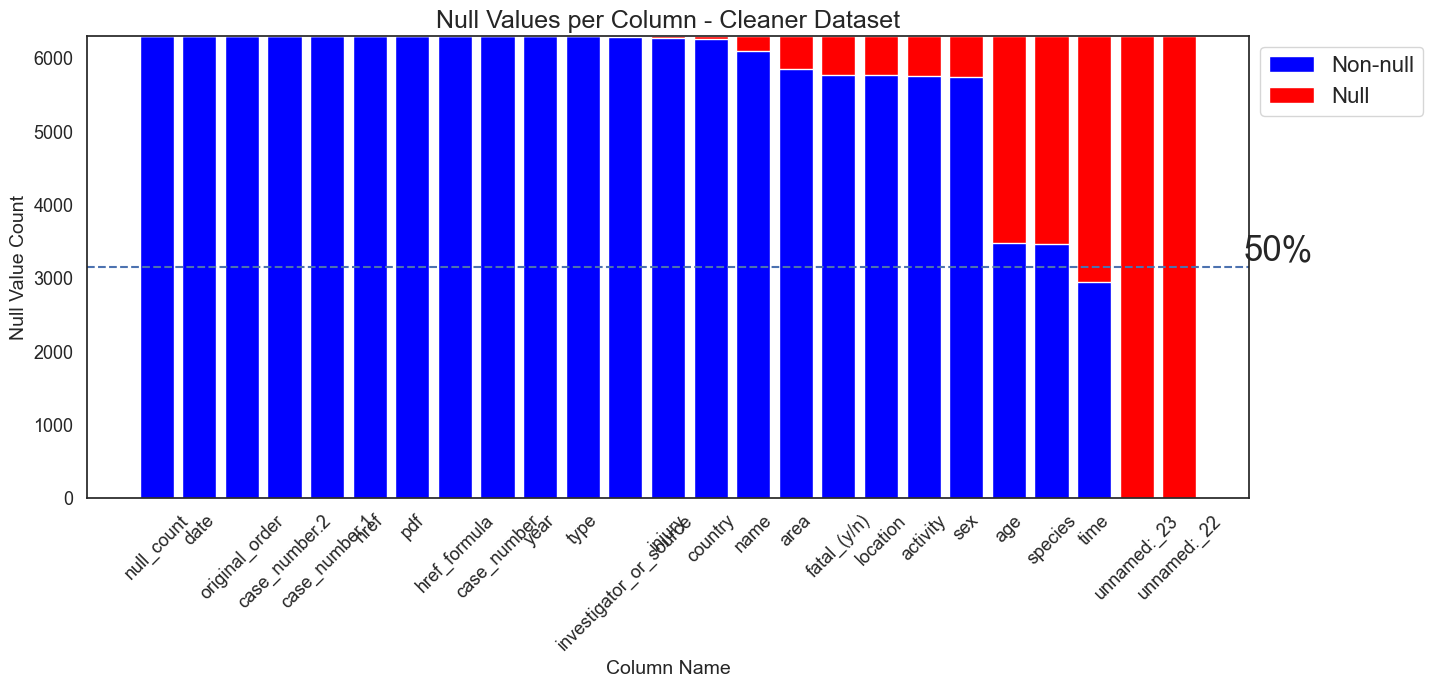

In [176]:
fig, ax = plt.subplots(figsize = (15, 6))

clean_null_count_cols = shark_clean.isnull().sum().sort_values()

plt.bar(x=clean_null_count_cols.index, height=shark_clean.shape[0], color="blue", label="Non-null")
plt.bar(x=clean_null_count_cols.index, height=clean_null_count_cols, bottom=shark_clean.shape[0]-clean_null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(25.5, shark_clean.shape[0]/2 + 100), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column - Cleaner Dataset", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

In [177]:
print(f"Number of unique values in column 'unnamed:_22': {shark_clean['unnamed:_22'].nunique()}")
print(list(shark_clean["unnamed:_22"].unique()))

Number of unique values in column 'unnamed:_22': 1
[nan, 'stopped here']


In [178]:
print(f"Number of unique values in column 'unnamed:_23': {shark_clean['unnamed:_23'].nunique()}")
print(list(shark_clean["unnamed:_23"].unique()))

Number of unique values in column 'unnamed:_23': 2
[nan, 'Teramo', 'change filename']


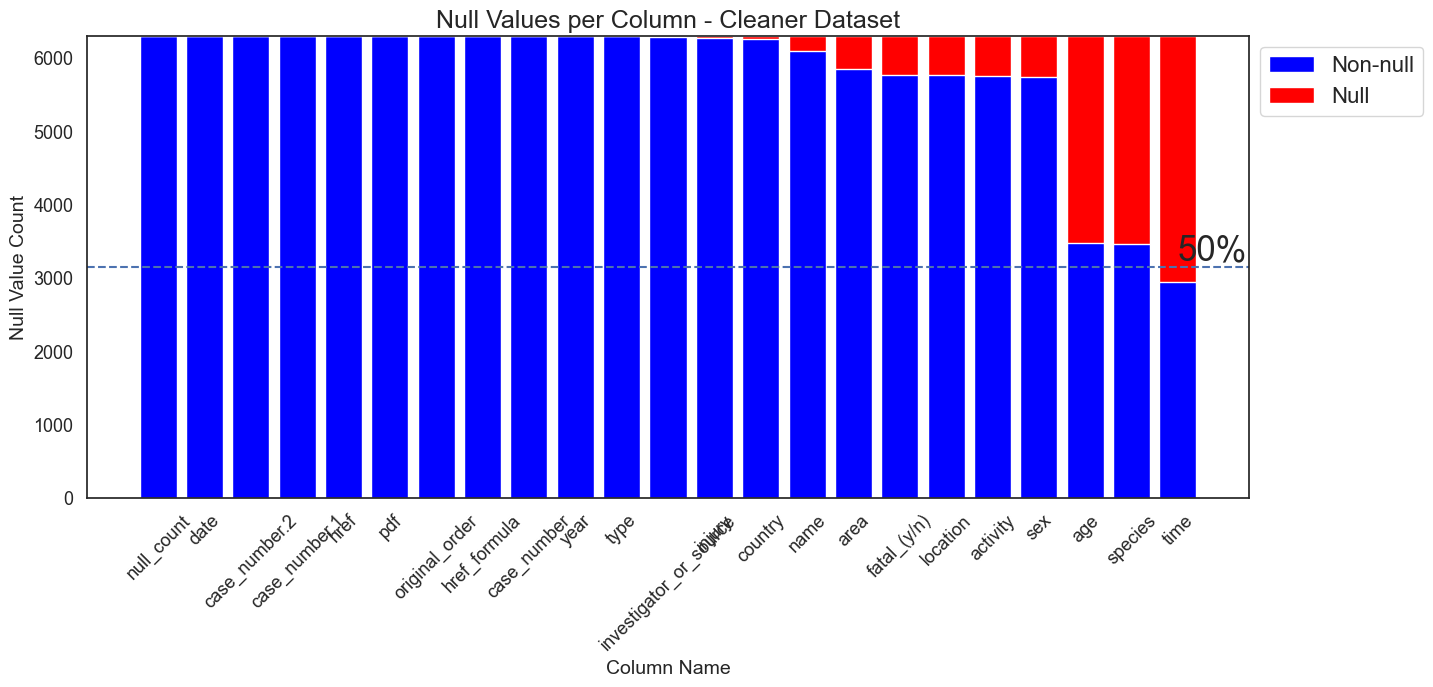

In [179]:
shark_clean = shark_clean.drop(columns=["unnamed:_22", "unnamed:_23"])

fig, ax = plt.subplots(figsize = (15, 6))

clean_null_count_cols = shark_clean.isnull().sum().sort_values()

plt.bar(x=clean_null_count_cols.index, height=shark_clean.shape[0], color="blue", label="Non-null")
plt.bar(x=clean_null_count_cols.index, height=clean_null_count_cols, bottom=shark_clean.shape[0]-clean_null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(22, shark_clean.shape[0]/2 + 100), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column - Cleaner Dataset", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

---

# Treating specific columns

---

## "activity" column

In [180]:
shark_clean["activity"].sample(5)

2513         Surfing
470     Spearfishing
5708          Diving
5466        Swimming
4516         Bathing
Name: activity, dtype: object

In [181]:
activity_regex = r"swimming|div|fish|surf|bath|boat|wading|kayak|snorkel|sail|compet|boogie board"

shark_clean["clean_activity"] = shark_clean["activity"].fillna("").apply(
    lambda act:
    re.findall(activity_regex, act.lower())[0] if len(re.findall(activity_regex, act.lower())) > 0
    else "other"
)
shark_clean[["activity","clean_activity"]].sample(6)

,activity,clean_activity
5098,Swimming,swimming
351,Body boarding,other
1915,Boogie Boarding,boogie board
58,Scuba diving,div
2321,Swimming,swimming
2849,Wading,wading


In [182]:
# Rename values to improve readability

# Create dict with new names
act_name = {
    "div": "diving",
    "surf": "surfing",
    "fish": "fishing",
    "bath": "bathing",
    "kayak": "kayaking",
    "snorkel": "snorkeling",
    "sail": "sailing",
    "compet": "competing",
    "boogie board": "boogie boarding"
}

# Apply to "clean_activity" column
shark_clean["clean_activity"] = shark_clean["clean_activity"].apply(
    lambda act: act_name[act]
    if act in act_name.keys()
    else act
)

In [183]:
shark_clean["clean_activity"].value_counts(normalize=True)

other              0.254364
surfing            0.191209
fishing            0.179308
swimming           0.174230
diving             0.091558
bathing            0.030467
wading             0.026817
boat               0.016344
snorkeling         0.015075
kayaking           0.009045
boogie boarding    0.007775
sailing            0.002856
competing          0.000952
Name: clean_activity, dtype: float64

---

## "age" column

In [184]:
mean_age = (
    shark_clean["age"]
    .dropna()
    .apply(lambda age: int(re.findall(r"[0-9]+", age)[0])
            if len(re.findall(r"[0-9]+", age)) > 0
            else 0
           )
    .astype(int)
    .mean()
)

mean_age = int(mean_age)
mean_age

27

In [185]:
shark_clean["clean_age"] = (
    shark_clean["age"]
    .fillna(str(0))
    .apply(
        lambda age: int(re.findall(r"[0-9]+", age)[0])
        if len(re.findall(r"[0-9]+", age)) > 0
        else str(0)
           )
    .astype(int)
)

shark_clean[["age", "clean_age"]].sample(5)

,age,clean_age
2254,12,12
6206,NaN,0
2789,30,30
6124,NaN,0
6089,52,52


---

## "case_number", "case_number.1" and "case_number.2" columns

In [186]:
# Are "case_number.1" and "case_number.2" exact copies of "case_number"?
case_number_eq_check = shark_clean[["case_number", "case_number.1", "case_number.2"]].apply(
    lambda row: all(row[col] == row["case_number"] for col in ["case_number.1", "case_number.2"]), axis=1
)
case_number_eq_check.head(3)

0    True
1    True
2    True
dtype: bool

In [187]:
print(f"'case_number', 'case_number.1' and 'case_number.2' diverge in {shark_clean.shape[0] - case_number_eq_check.sum()} rows")

shark_clean[case_number_eq_check == False][["case_number", "case_number.1", "case_number.2"]]

'case_number', 'case_number.1' and 'case_number.2' diverge in 24 rows


,case_number,case_number.1,case_number.2
34,2018.04.03,2018.04.02,2018.04.03
117,2017.07.20.a,2017/07.20.a,2017.07.20.a
144,2017.05.06,2017.06.06,2017.05.06
217,2016.09.15,2016.09.16,2016.09.15
314,2016.01.24.b,2015.01.24.b,2016.01.24.b
334,2015.12.23,2015.11.07,2015.12.23
339,2015.10.28.a,2015.10.28,2015.10.28.a
390,2015.07-10,2015.07.10,2015.07.10
560,2014.05.04,2013.05.04,2014.05.04
3522,1967.07.05,1967/07.05,1967.07.05


In [188]:
# For some reason, "case_number.1" and "case_number.2" are not exact copies of "case_number",
# diverging in 31 rows.
# I have decided to drop two of these columns, the criteria for this selection being the two columns
# with the highest number of null values.

shark_clean[["case_number", "case_number.1", "case_number.2"]].isna().sum()

case_number      1
case_number.1    0
case_number.2    0
dtype: int64

In [189]:
shark_clean = shark_clean.drop(columns=["case_number.1", "case_number.2"])

In [190]:
# Dropping the one null value in "case_number"

shark_clean = shark_clean.drop(index=shark_clean[shark_clean["case_number"].isna()].index)
shark_clean["case_number"].isna().sum()

0

---

## "country" column

In [191]:
coco = CountryConverter()

shark_clean["country_iso3"] = coco.pandas_convert(shark_clean["country"].fillna(""), to = "ISO3")

# extract the first value of list elements and leave string elements as is
shark_clean["country_iso3"] = shark_clean["country_iso3"].apply(lambda x: x[0] if isinstance(x, list) else str(x))

ENGLAND not found in regex
 not found in regex
COLUMBIA not found in regex
ATLANTIC OCEAN not found in regex
DIEGO GARCIA not found in regex
SCOTLAND not found in regex
AZORES not found in regex
GULF OF ADEN not found in regex
ST. MAARTIN not found in regex
CARIBBEAN SEA not found in regex
OKINAWA not found in regex
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for EGYPT / ISRAEL
More then one regular expression match for E

In [192]:
shark_clean[["country", "country_iso3"]].sample(5)

,country,country_iso3
1336,USA,USA
2391,USA,USA
4428,JAMAICA,JAM
5000,SOUTH AFRICA,ZAF
3013,USA,USA


In [193]:
shark_clean["country_iso3"].dtype

dtype('O')

In [194]:
# Create dataframe with incident count by country excluding "not found" rows
inc_by_country = (
    shark_clean.drop(index=shark_clean[shark_clean["country_iso3"] == "not found"].index)
    .groupby(by="country_iso3")
    .agg(count=("country_iso3", "count"))
    .reset_index()
    .sort_values(by="count")
)

# Create horizontal bar chart with top 10 count by country
fig = px.bar(
    data_frame = inc_by_country.tail(10),
    x = "count",
    y = "country_iso3",
    orientation = "h",
    title = "Incidents by Country",
    text = "count"
)

# Set axis labels
fig.update_layout(xaxis_title = "Frequency [count]", yaxis_title = "Country")

fig.show()

In [195]:
# Create choropleth map with plotly
fig = px.choropleth(
    data_frame = inc_by_country,
    locations = "country_iso3",
    color = "count",
    projection = "natural earth",
    color_continuous_scale = px.colors.sequential.Oranges,
    title = "Incident Count by Country"
)

fig.show()

---

## "date" column

In [196]:
def standardize_date(date_str):
    m_dict = {
        "jan": "01",
        "feb": "02",
        "mar": "03",
        "apr": "04",
        "may": "05",
        "jun": "06",
        "jul": "07",
        "aug": "08",
        "sep": "09",
        "oct": "10",
        "nov": "11",
        "dec": "12"
    }

    pattern = r'(\d{2})\-([a-z]{3})\-(\d{4})'
    match = re.search(pattern, date_str.lower())

    if match:
        year = match.group(3)
        month = m_dict[match.group(2)] if match.group(2) in m_dict.keys() else "01"
        day = match.group(1) if int(match.group(1)) <= 31 else "01"
        return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

    else:
        return None

def parse_date(date_str):
    standardized_date = standardize_date(date_str)

    if standardized_date:
        try:
            date = datetime.strptime(standardized_date, '%Y-%m-%d')
            year = date.year if date.year < 2023 else 1900
            month = date.month if 1 <= date.month <= 12 else 1
            day = date.day if 1 <= date.day <= 31 else 1
            return year, month, day

        except ValueError:
            pass

    return 1900, 1, 1

In [197]:
# create a new DataFrame with the extracted year, month, and day
shark_clean[["clean_year", "clean_month", "clean_day"]] = pd.DataFrame(shark_clean['date'].apply(parse_date).tolist(),
                        columns=['year', 'month', 'day'])

shark_clean[["date", "clean_year", "clean_month", "clean_day"]].sample(5)

,date,clean_year,clean_month,clean_day
50,13-Jan-2018,2018.0,1.0,13.0
4431,22-Oct-1951,1951.0,10.0,22.0
6086,Reported 23-Jan-1832,1831.0,8.0,24.0
7,27-May-2018,2018.0,5.0,27.0
4586,Feb-1947,1900.0,1.0,1.0


In [198]:
shark_clean[["clean_year", "clean_month", "clean_day"]].fillna({"clean_day": "01", "clean_month": "01", "clean_year": "1900"}).isna().sum()

clean_year     0
clean_month    0
clean_day      0
dtype: int64

In [199]:
# Fill NaN values and cast column values as int
shark_clean[["clean_year", "clean_month", "clean_day"]] = (
    shark_clean[["clean_year", "clean_month", "clean_day"]]
    .fillna({"clean_day": "01", "clean_month": "01", "clean_year": "1900"})
    .astype(int)
)

In [200]:
# Create "clean_date" column of type timestamp.
shark_clean["clean_date"] = pd.to_datetime(
    arg=shark_clean[["clean_year", "clean_month", "clean_day"]]
    .rename(columns={"clean_day": "day", "clean_month": "month", "clean_year": "year"}),
    format="%Y-%m-%d",
    errors="coerce"
)

shark_clean[["clean_year", "clean_month", "clean_day", "clean_date"]].sample(5)

,clean_year,clean_month,clean_day,clean_date
5228,1922,3,13,1922-03-13
4790,1939,10,4,1939-10-04
282,2016,4,23,2016-04-23
4798,1939,3,24,1939-03-24
1679,2004,4,13,2004-04-13


---

## "fatal_(y/n)" column

In [201]:
shark_clean["clean_fatal"] = (
    shark_clean["fatal_(y/n)"]
    .fillna("")
    .apply(
        lambda fatal:
        fatal.strip().lower() if fatal.strip().lower() == "y"
        else fatal.strip().lower() if fatal.strip().lower() == "n"
        else "unknown"
    )
)

shark_clean["clean_fatal"].value_counts(normalize=True)

n          0.682431
y          0.220441
unknown    0.097127
Name: clean_fatal, dtype: float64

---

## "injury" column

In [202]:
shark_clean["injury"].sample(4)

1026    Minor laceration to leg
3664    Bruised & abraded ankle
6230                Calf bitten
1323               Thigh bitten
Name: injury, dtype: object

In [203]:
injury_pattern = r"no injury|fatal|bit|lacerat|sever|abrasion|drown|bruise|puncture|minor"

shark_clean["clean_injury"] = shark_clean["injury"].fillna("").apply(
    lambda injury:
    re.findall(injury_pattern, injury.lower())[0] if len(re.findall(injury_pattern, injury.lower())) > 0
    else "unknown"
)
shark_clean[["injury","clean_injury"]].sample(6)

,injury,clean_injury
3025,"Probable drowning, 1.2 m [4'] shark hindered r...",drown
961,Lacerations to right hand,lacerat
388,Arm bitten,bit
676,Shark bites were post-mortem,bit
4628,FATAL,fatal
732,Laceration to toe,lacerat


In [204]:
# Rename values to improve readability

# Create dict with new names
injury_name = {
    "bit": "bite",
    "lacerat": "laceration",
    "minor": "minor injury",
    "sever": "severance",
    "drown": "drowning"
}

# Apply to "clean_injury" column
shark_clean["clean_injury"] = shark_clean["clean_injury"].apply(
    lambda injury: injury_name[injury]
    if injury in injury_name.keys()
    else injury
)

In [205]:
# Build value_counts() of "clean_injury" column
injury_value_counts = shark_clean["clean_injury"].value_counts(normalize=True)
injury_value_counts

fatal           0.211395
bite            0.206634
laceration      0.176321
unknown         0.133153
no injury       0.126964
severance       0.054595
minor injury    0.037137
puncture        0.026186
drowning        0.016029
abrasion        0.006031
bruise          0.005555
Name: clean_injury, dtype: float64

---

## "location" column

In [206]:
location_regex = r"bay|dock|island|river|lake|reef|harbor|offshore|beach|port|cove|sea|ocean|pier|strait"

shark_clean["clean_location"] = shark_clean["location"].fillna("unknown").apply(
    lambda location:
    re.findall(location_regex, location.lower())[0] if len(re.findall(location_regex, location.lower())) > 0
    else location if location == "unknown"
    else "other"
)
shark_clean[["location","clean_location"]].sample(6)

,location,clean_location
4191,Parry Island,island
1546,"Scarborough Beach, Perth",beach
3806,"Onboard tuna boat, M.V. Toscui Maru",other
1318,"Venice Pier, Venice, Los Angeles County",pier
1393,"Waveland Beach, Hutchinson Island, St. Lucie C...",beach
4084,"Venice Beach, Los Angeles County",beach


In [207]:
shark_clean["clean_location"].value_counts(normalize=True)

other       0.401524
beach       0.221076
island      0.089668
unknown     0.085701
bay         0.068561
river       0.035391
port        0.027773
reef        0.017140
harbor      0.014760
sea         0.011585
cove        0.006983
pier        0.005872
ocean       0.005396
lake        0.003968
offshore    0.002698
strait      0.001270
dock        0.000635
Name: clean_location, dtype: float64

---

## "sex" column

In [208]:
shark_clean["clean_sex"] = (
    shark_clean["sex"]
    .fillna("")
    .apply(
        lambda sex:
        sex.lower() if sex == "M"
        else sex.lower() if sex == "F"
        else "unknown"
           )
)

shark_clean["clean_sex"].value_counts(normalize=True)

m          0.808284
f          0.101095
unknown    0.090621
Name: clean_sex, dtype: float64

---

## "species" column

In [209]:
# Read the text file from the URL into a pandas DataFrame
url = 'https://scipython.com/static/media/problems/P4.2/shark-species.txt'
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()]
species_df = pd.DataFrame([line.strip().split(':') for line in lines], columns=['Species', 'Common Name'])

# Extract the common names and join them into a string separated by '|'
common_names = species_df['Common Name'].str.strip().str.lower()
common_names = common_names.fillna('')
species_string = '|'.join(common_names)

In [210]:
# Remove "shark" from each species.
species_string = re.sub(r" ?shark", "", species_string)

# Replace any instance of "[" and "]" for "", as it will mess with regex syntax.
species_string = re.sub(r"[\[\]]", "", species_string)

# Replace any " " with "" in an effort to match more species with the DataFrame's extremely unstructured "species" column
species_string = re.sub(" ", "", species_string)

# Replace any two or more "|" for only one "|" so as not to mess with regex syntax.
species_string = re.sub(r"\|+", "|", species_string)

# Remove the first "|" before any word for the same reason as above.
species_string = species_string[1:]

# Add "white" species to the string, as it isn't there for some reason.
species_string = species_string + "|white"

# Print the species string
print(species_string[:200])

blacknose|silvertip|bignose|graceful|greyreef|pigeye|borneo|copper|spinner|nervous|coates's|whitecheek|silky|creekwhaler|galapagos|pondicherry|human'swhaler|finetooth|smoothtoothblacktip|bull|blacktip


In [211]:
shark_clean["clean_species"] = shark_clean["species"].fillna("unknown").apply(
    lambda species: re.findall(species_string, species.replace(" ", "").lower())[0]
    if len(re.findall(species_string, species.replace(" ", "").lower())) > 0
    else "unknown"
)

shark_clean[["species", "clean_species"]].sample(5)

,species,clean_species
4941,NaN,unknown
4470,Shark involvement prior to death was not confi...,unknown
1739,NaN,unknown
5861,6' shark,unknown
1554,"2 m [6.75'] shark, 200-kg shark T",unknown


In [212]:
shark_clean["clean_species"].value_counts(normalize=True)

unknown                0.742581
white                  0.100936
tiger                  0.040311
bull                   0.028726
blacktip               0.015236
nurse                  0.014760
whale                  0.012062
blue                   0.008887
lemon                  0.005713
oceanicwhitetip        0.004126
spinner                0.003968
sandtiger              0.003174
greyreef               0.002698
caribbeanreef          0.002539
dusky                  0.002381
porbeagle              0.001270
galapagos              0.001111
basking                0.001111
angel                  0.000952
sandbar                0.000952
copper                 0.000794
shortfinmako           0.000635
silky                  0.000635
whitetipreef           0.000635
leopard                0.000476
tawnynurse             0.000476
salmon                 0.000476
goblin                 0.000317
broadnosesevengill     0.000317
cookiecutter           0.000317
silvertip              0.000317
portjack

---

## "time" column

In [213]:
shark_clean["time"].dropna().sample(5)

4035    Late night
462      Afternoon
3005         11h30
672      Afternoon
2575         09h00
Name: time, dtype: object

In [214]:
# Create regex to standardize "time" column to only contain 2 values: "a.m." and "p.m."

def standard_time(time_str):
    re_am_pm = r"a\.m\.|p\.m\."
    re_pm_words = r"evening|night|dusk|afternoon"
    re_am_words = r"morning|dawn"
    re_time = r"([0-9]{2})h([0-9]{2})"

    # Try first to find normal a.m. or p.m. match
    try1 = re.findall(re_am_pm, time_str)
    if try1:
        return try1[0]

    # If unsuccessful, move to p.m. words
    try2 = re.findall(re_pm_words, time_str)
    if try2:
        return "p.m."

    # If unsuccessful yet again, move to a.m. words
    try3 = re.findall(re_am_words, time_str)
    if try3:
        return "a.m."

    # If neither option is successful, move to time pattern
    try4 = re.search(re_time, time_str)
    if try4:
        hours = int(try4.group(1))
        if hours < 12:
            return "a.m."
        elif hours >=12:
            return "p.m."

    return "unknown"

In [215]:
# Apply standard_time function to "time" column to create "clean_time" column
shark_clean["clean_time"] = shark_clean["time"].fillna("").map(standard_time)
shark_clean[["time", "clean_time"]].sample(5)

,time,clean_time
3105,NaN,unknown
4347,NaN,unknown
4574,NaN,unknown
1842,18h45,p.m.
5457,NaN,unknown


In [216]:
shark_clean["clean_time"].value_counts(normalize=True)

unknown    0.613236
p.m.       0.254721
a.m.       0.132043
Name: clean_time, dtype: float64

---

## "type" column

In [217]:
shark_clean["type"].value_counts(normalize=True)

Unprovoked      0.729713
Provoked        0.090996
Invalid         0.086867
Sea Disaster    0.037955
Boating         0.032238
Boat            0.021756
Questionable    0.000318
Boatomg         0.000159
Name: type, dtype: float64

In [218]:
shark_clean["clean_type"] = shark_clean["type"].apply(
    lambda atype: "Boating"
    if atype == "Boatomg"
    else atype
)

shark_clean["clean_type"].value_counts(normalize=True)

Unprovoked      0.729713
Provoked        0.090996
Invalid         0.086867
Sea Disaster    0.037955
Boating         0.032396
Boat            0.021756
Questionable    0.000318
Name: clean_type, dtype: float64

---

## Column Cardinality

In [219]:
print(f"For comparison reasons, shark_clean shape is {shark_clean.shape}")
categorical_cardinality = shark_clean.select_dtypes(include="object").nunique().sort_values(ascending=False)
categorical_cardinality

For comparison reasons, shark_clean shape is (6301, 35)


pdf                       6290
href_formula              6289
case_number               6285
href                      6284
date                      5432
name                      5229
investigator_or_source    4969
location                  4108
injury                    3736
species                   1549
activity                  1532
area                       825
time                       366
country                    212
age                        157
country_iso3               134
clean_species               38
clean_location              17
clean_activity              13
clean_injury                11
fatal_(y/n)                  8
type                         8
clean_type                   7
sex                          6
clean_fatal                  3
clean_sex                    3
clean_time                   3
dtype: int64

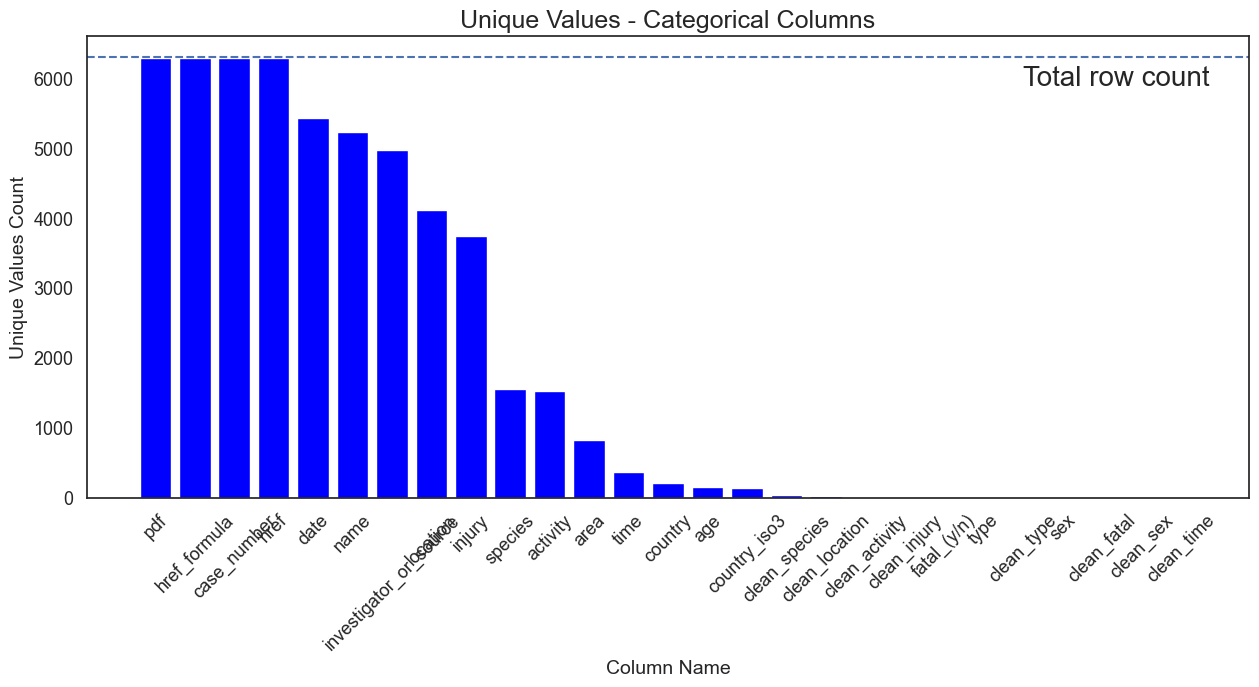

In [220]:
fig, ax = plt.subplots(figsize = (15, 6))

plt.bar(x=categorical_cardinality.index, height=categorical_cardinality, color="blue")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0], linestyle="--")
ax.annotate("Total row count", xy=(22, shark_clean.shape[0] -400), fontsize=20)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Unique Values Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Unique Values - Categorical Columns", fontsize=18);

In [221]:
# Drop high-cardinality categorical columns that won't be treated
# (except "case_number", which will act as primary key).
shark_clean = shark_clean.drop(columns=
                               ["pdf", "href_formula", "href", "name", "original_order",
                                "case_number", "date", "investigator_or_source", "location", "injury",
                                "species", "activity", "area", "time", "age", "type", "null_count",
                                "year", "sex", "fatal_(y/n)", "country"])

In [222]:
print(f"For comparison reasons, shark_clean shape is {shark_clean.shape}")
new_categorical_cardinality = shark_clean.select_dtypes(include="object").nunique().sort_values(ascending=False)
new_categorical_cardinality

For comparison reasons, shark_clean shape is (6301, 14)


country_iso3      134
clean_species      38
clean_location     17
clean_activity     13
clean_injury       11
clean_type          7
clean_fatal         3
clean_sex           3
clean_time          3
dtype: int64

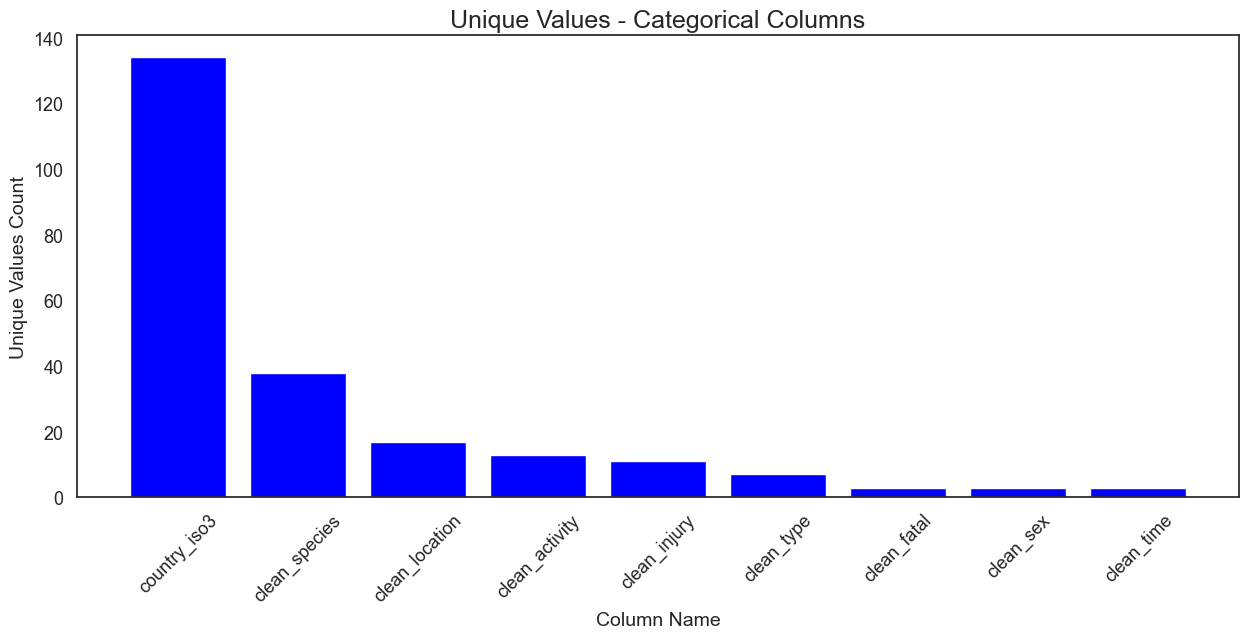

In [223]:
fig, ax = plt.subplots(figsize = (15, 6))

plt.bar(x=new_categorical_cardinality.index, height=new_categorical_cardinality, color="blue")

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Unique Values Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Unique Values - Categorical Columns", fontsize=18);

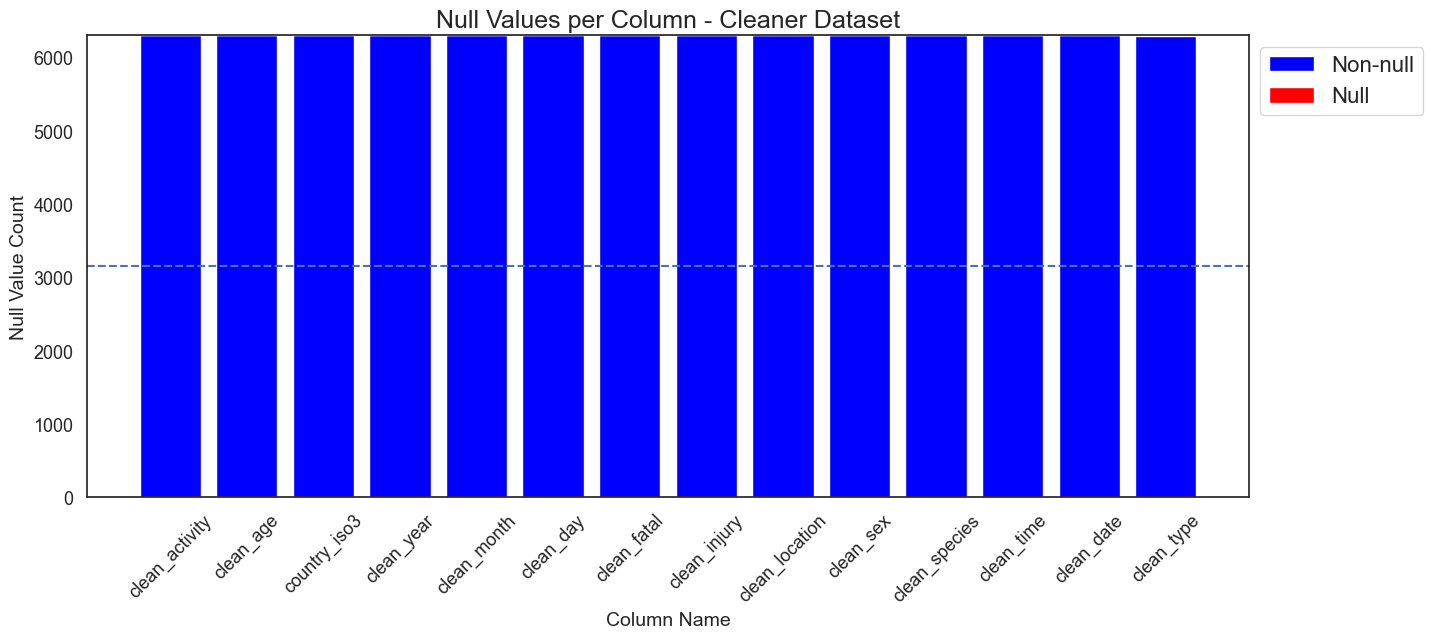

In [224]:
fig, ax = plt.subplots(figsize = (15, 6))

clean_null_count_cols = shark_clean.isnull().sum().sort_values()

plt.bar(x=clean_null_count_cols.index, height=shark_clean.shape[0], color="blue", label="Non-null")
plt.bar(x=clean_null_count_cols.index, height=clean_null_count_cols, bottom=shark_clean.shape[0]-clean_null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(22, shark_clean.shape[0]/2 + 100), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column - Cleaner Dataset", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

---

## Data Analysis

---

## Hypotheses

##### 1. Are provoked incidents more likely to be fatal?
##### 2. Is an incident more likely to happen on specific locations depending on the time of day (a.m. or p.m.)?
##### 3. According to the data at hand, which shark species is the most lethal? And the least lethal?
##### 4. Is age a relevant factor when it comes to the fatality of an attack?

---

#### 1. Are provoked incidents more likely to be fatal?

In [225]:
# create mask to select only rows with "Provoked" or "Unprovoked" incidents
# and "n" or "y" fatal incidents
type_fatal_selection = (
    shark_clean[
        ((shark_clean["clean_type"] == "Provoked") | (shark_clean["clean_type"] == "Unprovoked"))
        & ((shark_clean["clean_fatal"] == "y") | (shark_clean["clean_fatal"] == "n"))
    ]
    [["clean_type", "clean_fatal"]]
)

In [226]:
type_fatal_gb = type_fatal_selection.groupby(by=["clean_type", "clean_fatal"])
tfgb_count = type_fatal_gb.agg(
    count=("clean_type", "count")
).reset_index()
tfgb_count

,clean_type,clean_fatal,count
0,Provoked,n,547
1,Provoked,y,19
2,Unprovoked,n,3351
3,Unprovoked,y,1181


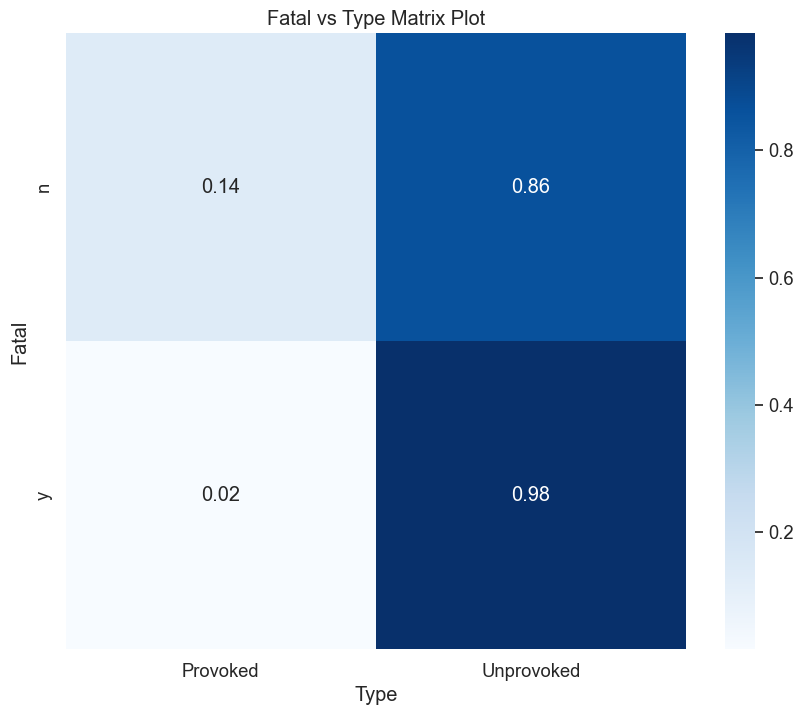

In [227]:
# create a crosstab between the two columns
tfgb_crosstab = pd.crosstab(type_fatal_selection["clean_fatal"], type_fatal_selection["clean_type"], normalize="index")

# create a heatmap using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(tfgb_crosstab, cmap="Blues", annot=True, fmt=".2f", ax=ax)

# add labels and title
sns.set(font_scale=1.2)
sns.set_style("white")
plt.xlabel("Type")
plt.ylabel("Fatal")
plt.title("Fatal vs Type Matrix Plot")

# show the plot
plt.show()

In [228]:
# Select the counts for non-fatal unprovoked and fatal unprovoked incidents
non_fatal_count_unprov = tfgb_count["count"].iloc[2]
fatal_count_unprov = tfgb_count["count"].iloc[3]

# Divide the counts
ratio_unprov = round(fatal_count_unprov / non_fatal_count_unprov, 2)
ratio_unprov

0.35

In [229]:
# Select the counts for non-fatal provoked and fatal provoked incidents
non_fatal_count_prov = tfgb_count["count"].iloc[0]
fatal_count_prov = tfgb_count["count"].iloc[1]

# Divide the counts
ratio_prov = round(fatal_count_prov / non_fatal_count_prov, 2)
ratio_prov

0.03

In [230]:
print(f"The proportion of provoked fatal incidents to provoked non-fatal incidents is {ratio_prov}, while the unprovoked incident ratio is {ratio_unprov}. According to this, unprovoked incidents are roughly {round(ratio_unprov/ratio_prov, 1)} times more fatal than provoked incidents")

The proportion of provoked fatal incidents to provoked non-fatal incidents is 0.03, while the unprovoked incident ratio is 0.35. According to this, unprovoked incidents are roughly 11.7 times more fatal than provoked incidents


---

#### 2. On specific locations, is an incident more likely to happen depending on the time of day (a.m. or p.m.)?

In [231]:
# create mask to select only rows with "a.m." or "p.m." incidents
# and group shark_clean by "location" excluding rows with "other" and "unknown" location value
loc_time_selection = (shark_clean[
    (
        (shark_clean["clean_location"] != "other")
        &
        (shark_clean["clean_location"] != "unknown")
    )
    &
    (
        (shark_clean["clean_time"] == "a.m.")
        |
        (shark_clean["clean_time"] == "p.m.")
    )
    ])

In [232]:
location_gb = (
    loc_time_selection
    .groupby(by=["clean_location", "clean_time"])
)

location_gb.agg(
    count = ("clean_location", "count")
)

count
clean_location clean_time       
bay            a.m.           61
               p.m.          116
beach          a.m.          293
               p.m.          610
cove           a.m.           10
               p.m.           13
dock           p.m.            2
harbor         a.m.            3
               p.m.            8
island         a.m.           53
               p.m.          136
lake           a.m.            5
               p.m.            2
ocean          a.m.            7
               p.m.           13
offshore       a.m.            2
               p.m.            5
pier           a.m.            1
               p.m.           13
port           a.m.           21
               p.m.           27
reef           a.m.           22
               p.m.           19
river          a.m.           23
               p.m.           34
sea            a.m.            8
               p.m.           13

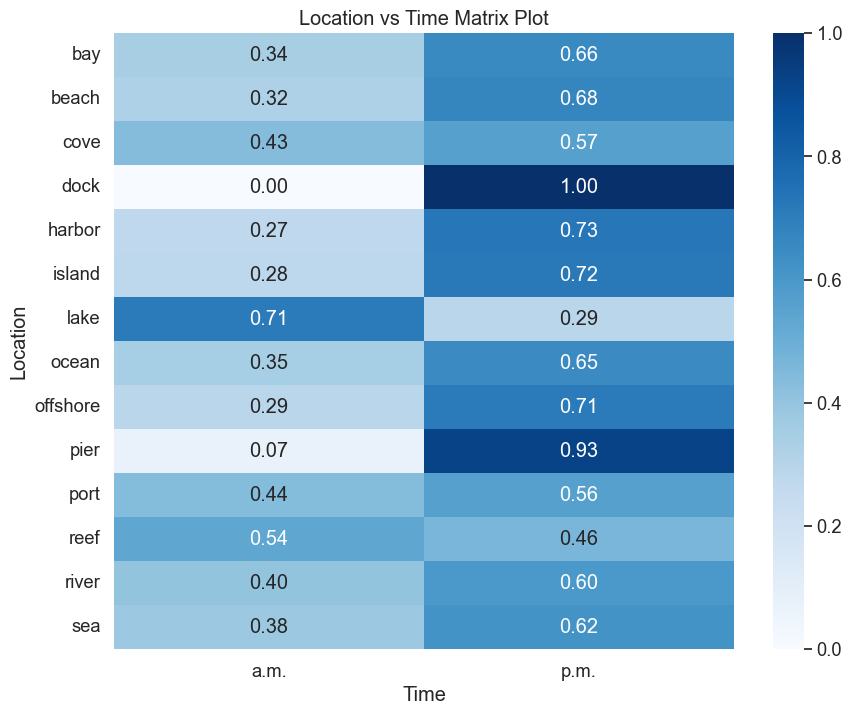

In [233]:
# create a crosstab between the two columns
loc_time_crosstab = pd.crosstab(loc_time_selection["clean_location"], loc_time_selection["clean_time"], normalize="index")

# create a heatmap using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(loc_time_crosstab, cmap="Blues", annot=True, fmt=".2f", ax=ax)

# add labels and title
sns.set(font_scale=1.2)
sns.set_style("white")
plt.xlabel("Time")
plt.ylabel("Location")
plt.title("Location vs Time Matrix Plot")

# show the plot
plt.show()

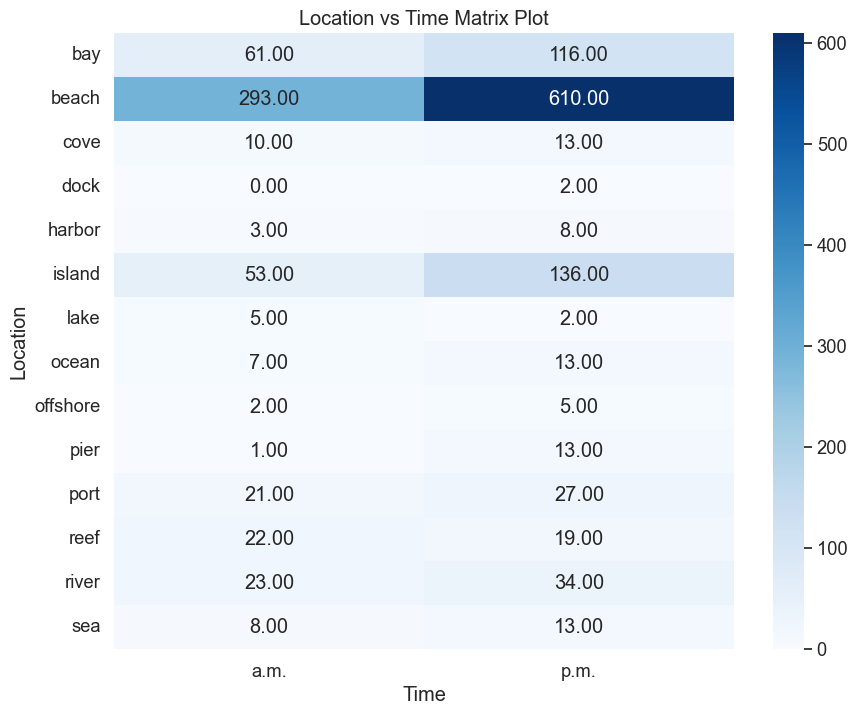

In [234]:
# create a crosstab between the two columns
loc_time_crosstab = pd.crosstab(loc_time_selection["clean_location"], loc_time_selection["clean_time"])

# create a heatmap using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(loc_time_crosstab, cmap="Blues", annot=True, fmt=".2f", ax=ax)

# add labels and title
sns.set(font_scale=1.2)
sns.set_style("white")
plt.xlabel("Time")
plt.ylabel("Location")
plt.title("Location vs Time Matrix Plot")

# show the plot
plt.show()

---

#### 3. According to the data at hand, which shark species is the most lethal? And the least lethal?

In [235]:
species_fatal_selection = (shark_clean[
    (shark_clean["clean_species"] != "unknown")
    &
    (
        (shark_clean["clean_fatal"] == "n")
        |
        (shark_clean["clean_fatal"] == "y")
    )]
)

In [236]:
species_gb = species_fatal_selection.groupby(by=["clean_species", "clean_fatal"])

species_gb_count_agg = species_gb.agg(
    count=("clean_species", "count")
).reset_index()
species_gb_count_agg

,clean_species,clean_fatal,count
0,angel,n,6
1,basking,n,5
2,basking,y,2
3,blacktip,n,96
4,blind,n,1
5,blue,n,43
6,blue,y,11
7,broadnosesevengill,n,2
8,bull,n,142
9,bull,y,38


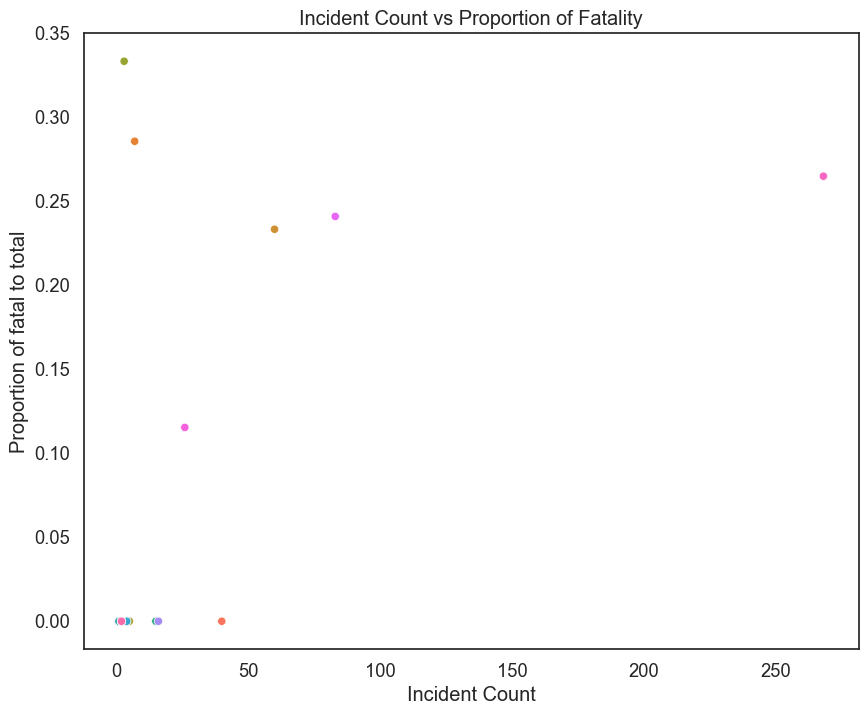

In [237]:
# create a crosstab between the two and create "prop" and "count" column.
species_fatal_crosstab = pd.crosstab(species_fatal_selection["clean_species"], loc_time_selection["clean_fatal"]).reset_index()
species_fatal_crosstab["count"] = species_fatal_crosstab["n"] + species_fatal_crosstab["y"]
species_fatal_crosstab["prop"] = species_fatal_crosstab["y"] / species_fatal_crosstab["count"]

# create a heatmap using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
scatter = sns.scatterplot(x="count", y="prop", hue="clean_species", data=species_fatal_crosstab, ax=ax)

# add labels and title
sns.set(font_scale=1.2)
sns.set_style("white")
plt.xlabel("Incident Count")
plt.ylabel("Proportion of fatal to total")
plt.title("Incident Count vs Proportion of Fatality")

# remove legend
ax.legend_.remove()

# show the plot
plt.show()

---

#### 4. Is age a relevant factor when it comes to the fatality of an attack?

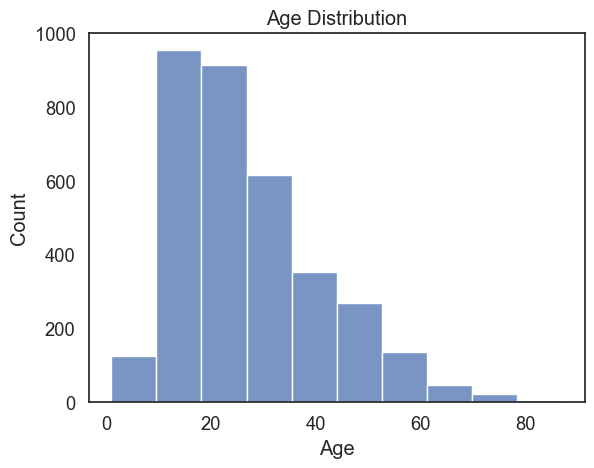

In [238]:
sns.histplot(data=shark_clean[shark_clean["clean_age"] > 0], x="clean_age", bins=10)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution");

In [243]:
age_fatal_selection = (shark_clean[
    (shark_clean["clean_fatal"] != "unknown")
    &
    (shark_clean["clean_age"] > 0)]
)

age_fatal_df = (
    age_fatal_selection.groupby(by=["clean_age", "clean_fatal"])
    [["clean_age", "clean_fatal"]]
    .agg(count=("clean_age", "count"))
    .reset_index()
    .sort_values(by="clean_age")
)

age_fatal_df.head(5)

,clean_age,clean_fatal,count
0,1,y,1
1,2,y,1
2,3,n,2
3,3,y,3
4,5,n,5


In [270]:
age_fatal_crosstab = pd.crosstab(age_fatal_selection["clean_age"], age_fatal_selection["clean_fatal"]).reset_index()
age_fatal_crosstab["clean_age"] = age_fatal_crosstab["clean_age"].astype(int)
age_fatal_crosstab["count"] = age_fatal_crosstab["y"] + age_fatal_crosstab["n"]
age_fatal_crosstab["prop"] = round(age_fatal_crosstab["y"] / age_fatal_crosstab["count"], 2)
# use pd.cut() to bin the clean_age column into 10 intervals
age_fatal_crosstab["age_group"] = pd.cut(shark_clean["clean_age"], bins=10)
age_fatal_crosstab["age_group_str"] = age_fatal_crosstab["age_group"].astype(str)

age_fatal_crosstab=age_fatal_crosstab.sort_values(by="age_group")

age_fatal_crosstab.head(5)

clean_fatal,clean_age,n,y,count,prop,age_group,age_group_str
59,61,12,1,13,0.08,"(-0.087, 8.7]","(-0.087, 8.7]"
30,32,51,13,64,0.20,"(-0.087, 8.7]","(-0.087, 8.7]"
22,24,84,14,98,0.14,"(-0.087, 8.7]","(-0.087, 8.7]"
32,34,41,6,47,0.13,"(-0.087, 8.7]","(-0.087, 8.7]"
20,22,78,31,109,0.28,"(-0.087, 8.7]","(-0.087, 8.7]"


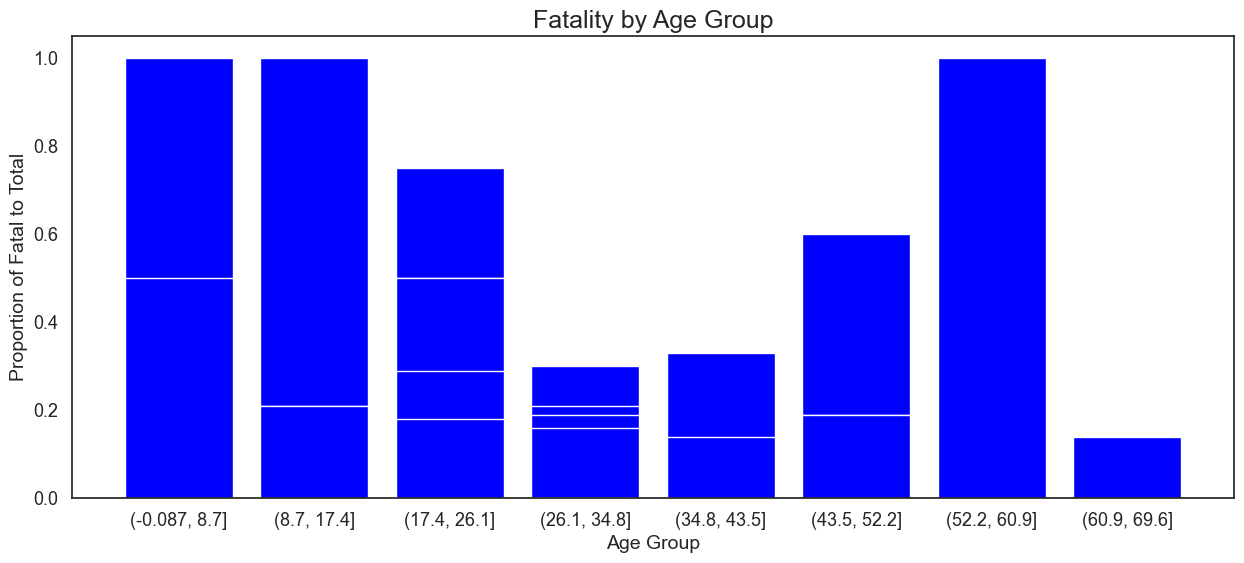

In [271]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.bar(x=age_fatal_crosstab["age_group_str"], height=age_fatal_crosstab["prop"], color="blue")

# x-labels
ax.set_xlabel("Age Group", fontsize=14)
plt.xticks(fontsize=13)

# y-labels
ax.set_ylabel("Proportion of Fatal to Total", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Fatality by Age Group", fontsize=18);